In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 加载数据
df = pd.read_csv(r'D:\下载\网盘\1.视频\9.项目实战\课件\项目\order_info_2016.csv', index_col='id')

In [3]:
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,35300,35300,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
3,211494392,2669372,934,220002,62100,62100,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47


In [4]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.045570e+05,1.045570e+05,104557.000000,104557.000000,1.045570e+05,1.045570e+05,104557.000000
mean,2.993341e+08,3.270527e+06,504.566275,154410.947225,9.167350e+04,8.686689e+04,2.385292
std,5.149818e+07,4.138208e+07,288.130647,72197.163762,9.158836e+04,9.072028e+04,0.648472
min,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000e+02,-1.000000e+03,1.000000
25%,2.633627e+08,2.179538e+06,254.000000,100011.000000,3.790000e+04,3.360000e+04,2.000000
50%,2.989828e+08,2.705995e+06,507.000000,150001.000000,5.920000e+04,5.500000e+04,2.000000
75%,3.349972e+08,3.271237e+06,758.000000,220002.000000,1.080000e+05,1.040000e+05,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,2.295600e+06,2.294200e+06,6.000000


In [5]:
# 加载device_type
device_type = pd.read_csv(r'D:\下载\网盘\1.视频\9.项目实战\课件\项目\device_type.txt')
device_type

,id,deviceType
0,1,PC
1,2,Android
2,3,iPhone
3,4,Wap
4,5,other


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
orderId       104557 non-null int64
userId        104557 non-null int64
productId     104557 non-null int64
cityId        104557 non-null int64
price         104557 non-null int64
payMoney      104557 non-null int64
channelId     104549 non-null object
deviceType    104557 non-null int64
createTime    104557 non-null object
payTime       104557 non-null object
dtypes: int64(7), object(3)
memory usage: 8.8+ MB


In [7]:
df.orderId.unique().size

104530

In [8]:
df.orderId.size

104557

In [9]:
df.userId.size

104557

In [10]:
df.cityId.unique().size

331

In [11]:
df.price = df.price / 100

In [12]:
df[df.payMoney < 0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
25344,288096069,2145955,511,230014,111.0,-1000,df9f79c426,2,2016-03-11 21:32:54,2016-03-11 21:33:10
55044,296608442,4073997,385,120006,111.0,-1000,cbccc0808e,2,2016-05-24 08:52:04,2016-05-24 08:52:23
66897,316685479,1949907,554,60019,2084.0,-1000,9058255c90,3,2016-03-31 11:57:46,2016-03-31 11:57:46
72556,323229098,2894042,548,220008,114.0,-1000,41a4e91d29,2,2016-08-09 14:24:13,2016-08-09 14:24:26
81494,311194385,3370399,797,40001,116.0,-990,ea5648bbe2,1,2016-09-06 11:20:43,2016-09-06 11:21:31
87878,324068352,1873953,602,260003,292.0,-1000,9058255c90,3,2016-10-05 10:47:05,2016-10-05 10:47:05


In [13]:
df.drop(index=df[df.payMoney < 0].index, inplace=True)

In [14]:
df[df.payMoney < 0].index

Int64Index([], dtype='int64', name='id')

In [15]:
df.payMoney = df.payMoney / 100

In [16]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
19086,284008366,3309847,698,240001,2164.0,2040.0,NaN,2,2016-03-08 22:36:12,2016-03-08 22:36:50
38175,287706890,2799815,823,70001,760.0,749.0,NaN,3,2016-06-10 22:30:18,2016-06-10 22:30:47
48073,248057459,3970570,142,130001,474.0,400.0,NaN,2,2016-03-30 12:59:03,2016-03-30 12:59:13
75949,266847859,3761925,649,120006,257.0,257.0,NaN,2,2016-08-19 08:46:22,2016-08-19 08:46:39
100952,283627429,4156620,269,280001,484.0,410.0,NaN,2,2016-12-13 13:24:37,2016-12-13 14:47:08
100953,346836140,3751526,738,100013,105.0,80.0,NaN,1,2016-12-13 13:47:34,2016-12-13 13:47:44
100954,352853915,2229389,786,240001,474.0,440.0,NaN,2,2016-12-13 16:54:09,2016-12-13 16:55:00
100955,379473081,4531810,18,180009,146.0,50.0,NaN,3,2016-12-13 20:18:22,2016-12-13 20:18:34


In [17]:
df.drop(index=df[df.channelId.isnull()].index, inplace=True)


In [18]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [19]:
df.createTime = pd.to_datetime(df.createTime)
df.payTime = pd.to_datetime(df.payTime)
df.dtypes

orderId                int64
userId                 int64
productId              int64
cityId                 int64
price                float64
payMoney             float64
channelId             object
deviceType             int64
createTime    datetime64[ns]
payTime       datetime64[ns]
dtype: object

In [20]:
import datetime

In [21]:
startTime = datetime.datetime(2016,1,1)
endTime = datetime.datetime(2016,12,31,23,59,59)

In [22]:
df[df.createTime < startTime]
df.drop(index=df[df.createTime < startTime].index, inplace=True)
df[df.createTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [23]:
df.drop(index=df[df.createTime> df.payTime].index, inplace=True)

In [24]:
df[df.createTime > endTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [25]:
df[df.payTime < endTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,353.0,353.0,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
2,222298971,1664684,801,330001,512.0,499.0,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
3,211494392,2669372,934,220002,621.0,621.0,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
4,334575272,1924727,422,230001,506.0,420.0,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
5,144825651,4148671,473,130006,1491.0,1420.0,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47
...,...,...,...,...,...,...,...,...,...,...
104548,298711582,1921881,394,330005,177.0,140.0,41a4e91d29,2,2016-12-31 10:00:34,2016-12-31 10:01:55
104549,271053466,3463231,533,60005,755.0,720.0,09b7f0541e,4,2016-12-31 02:51:54,2016-12-31 02:52:35
104550,331281655,3776844,537,60005,498.0,440.0,09b7f0541e,4,2016-12-31 02:52:52,2016-12-31 02:53:29


In [26]:
df[df.payTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [27]:
df.orderId.unique().size

104506

In [28]:
df.orderId.size

104533

In [29]:
df.drop(index=df[df.orderId.duplicated()].index, inplace=True)
df.orderId.unique().size

104506

In [30]:
df.drop(index=df[df.productId==0].index, inplace=True)

数据清洗完就可以开始分析了

In [31]:
print(df.orderId.count())

104329


In [32]:
print(df.userId.unique().size)

102447


In [33]:
print(df.payMoney.sum()/100)

906663.997


In [34]:
print(df.productId.unique().size)

1000


In [37]:
productId_orderCount = df.groupby('productId').count()['orderId'].sort_values(ascending=False)
print(productId_orderCount.head(10))
print(productId_orderCount.tail(10))

productId
895    354
762    350
103    334
587    303
385    302
60     301
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64
productId
948     29
856     28
621     27
272     26
563     24
347     21
597     19
468     18
986     16
1000    13
Name: orderId, dtype: int64


In [38]:
# 销售额
productId_turnover = df.groupby('productId').sum()['payMoney'].sort_values(ascending=False)
print(productId_turnover.head(10))
print(productId_turnover.tail(10))

productId
385    427522.1
61     361572.0
103    344641.2
405    339525.0
720    322405.1
345    320162.2
698    318458.6
182    296600.0
383    280790.0
396    269556.0
Name: payMoney, dtype: float64
productId
310     22879.0
847     22869.0
454     22535.0
817     22509.0
597     21847.0
408     18111.0
986     14784.0
964     14238.0
1000    12169.0
347     12070.0
Name: payMoney, dtype: float64


In [39]:
problem_productIds = productId_turnover.tail(100).index.intersection(productId_orderCount.tail(100).index)
problem_productIds

Int64Index([  14,  807,  599,  676,    7,  469,  577,  551,  318,  220,  528,
             303,  314,  359,  629,  582,  985,  218,  578,  227,  277,  145,
             855,  586,  958,   91,  856,  948,  859,  874,  806,  272,  392,
              27,  460,  436,  468,  579,  868,  137,   16,  590,  247,  569,
             242,  104,  621,  478,  310,  847,  454,  817,  597,  408,  986,
             964, 1000,  347],
           dtype='int64', name='productId')

In [40]:
# 城市的分析和商品维度类型
cityId_orderCount = df.groupby('cityId').count()['orderId'].sort_values(ascending=False)
cityId_payMoney = df.groupby('cityId').sum()['payMoney'].sort_values(ascending=False)

In [41]:
bins = np.arange(0, 25000, 100)
pd.cut(df.price, bins)

id
1           (300, 400]
2           (500, 600]
3           (600, 700]
4           (500, 600]
5         (1400, 1500]
              ...     
104548      (100, 200]
104549      (700, 800]
104550      (400, 500]
104551    (1400, 1500]
104552      (700, 800]
Name: price, Length: 104329, dtype: category
Categories (249, interval[int64]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (24500, 24600] < (24600, 24700] < (24700, 24800] < (24800, 24900]]

(array([9.9200e+02, 7.0420e+03, 9.9660e+03, 1.0745e+04, 1.4758e+04,
        9.2490e+03, 8.7730e+03, 7.1320e+03, 2.8580e+03, 3.2110e+03,
        4.7370e+03, 1.8420e+03, 1.1770e+03, 1.8600e+03, 1.6440e+03,
        5.8700e+02, 1.7750e+03, 2.2170e+03, 6.6800e+02, 1.8000e+03,
        2.8160e+03, 6.4000e+02, 2.8400e+02, 2.8200e+02, 4.7200e+02,
        1.9600e+02, 7.0300e+02, 8.2200e+02, 1.8300e+02, 7.3400e+02,
        1.1970e+03, 2.5600e+02, 1.0300e+02, 1.2000e+02, 1.0700e+02,
        4.1000e+01, 1.0600e+02, 2.1400e+02, 9.0000e+01, 3.6000e+02,
        5.0700e+02, 9.9000e+01, 6.8000e+01, 2.4000e+01, 3.0000e+01,
        1.2000e+01, 5.2000e+01, 4.5000e+01, 1.5000e+01, 6.6000e+01,
        1.5300e+02, 5.0000e+01, 1.6000e+01, 2.2000e+01, 1.7000e+01,
        1.0000e+00, 2.2000e+01, 1.0000e+01, 1.0000e+01, 4.0000e+01,
        4.8000e+01, 1.6000e+01, 7.0000e+00, 1.1000e+01, 2.0000e+00,
        6.0000e+00, 3.0000e+00, 4.7000e+01, 6.0000e+00, 2.8000e+01,
        3.2000e+01, 6.0000e+00, 3.0000e+00, 0.00

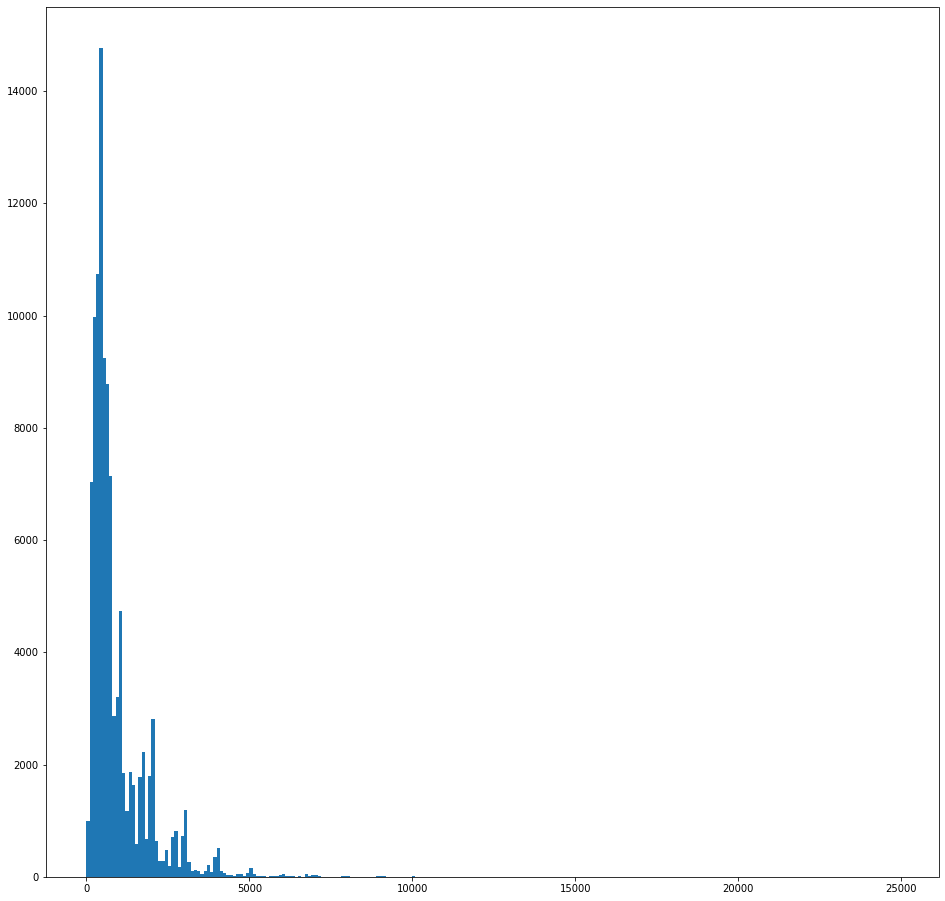

In [42]:
plt.figure(figsize=(16,16))
plt.hist(df['price'], bins)

In [43]:
price_cut_count  = pd.cut(df.price, bins).value_counts()
zero_cut_result = (price_cut_count == 0)
zero_cut_result[zero_cut_result.values].index

CategoricalIndex([(11300, 11400], (10800, 10900], (10600, 10700],
                  (10700, 10800], (11800, 11900], (10500, 10600],
                  (11700, 11800], (11400, 11500], (11100, 11200],
                  (11200, 11300],
                  ...
                  (16600, 16700], (16500, 16600], (16400, 16500],
                  (16300, 16400], (16200, 16300], (16100, 16200],
                  (16000, 16100], (15900, 16000], (15800, 15900],
                  (12400, 12500]],
                 categories=[(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600], (600, 700], (700, 800], ...], ordered=True, dtype='category', length=153)

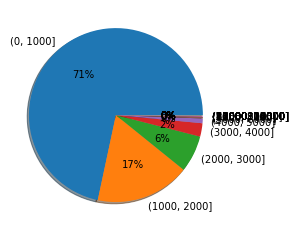

In [45]:
bins = np.arange(0, 25000, 1000)
price_cut = pd.cut(df.price, bins).value_counts()
m = plt.pie(x = price_cut.values, labels=price_cut.index, autopct='%d%%', shadow=True)

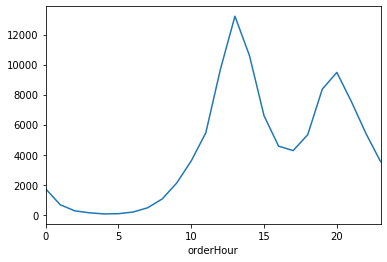

In [46]:
df['orderHour'] = df.createTime.dt.hour
df.groupby('orderHour').count()['orderId'].plot()

In [47]:
df['orderWeek'] = df.createTime.dt.dayofweek
df.groupby('orderWeek').count()['orderId']

orderWeek
0    12503
1    12484
2    12932
3    13794
4    16198
5    19496
6    16922
Name: orderId, dtype: int64

In [49]:
def get_seconds(x):
    return x.total_seconds()
df['payDelta'] = (df['payTime'] - df['createTime']).apply(get_seconds)

In [50]:
bins = [0, 50, 100, 1000, 10000, 100000]
pd.cut(df.payDelta, bins).value_counts()

(0, 50]            79229
(100, 1000]        12899
(50, 100]          10674
(1000, 10000]        968
(10000, 100000]      231
Name: payDelta, dtype: int64

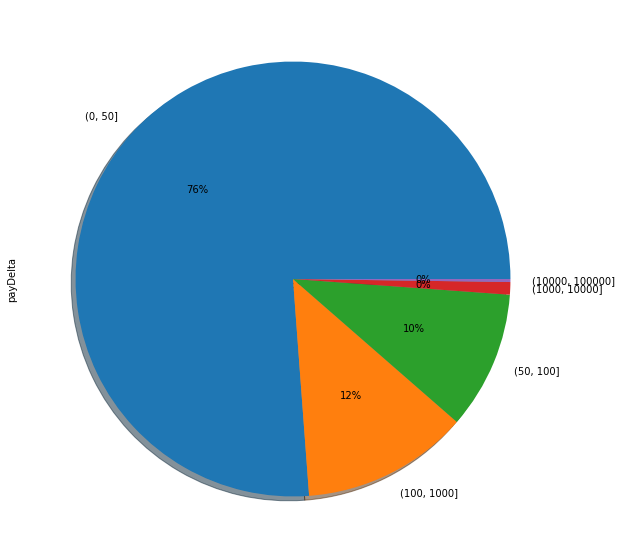

In [51]:
pd.cut(df.payDelta, bins).value_counts().plot(kind='pie', autopct='%d%%', shadow=True, figsize=(10, 10))

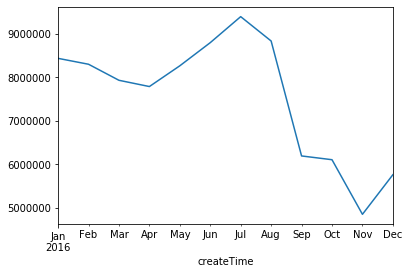

In [52]:
df.set_index('createTime', inplace=True)
turnover = df.resample('M').sum()['payMoney']
order_count = df.resample('M').count()['orderId']

turnover.plot()